# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Train_data_agm.csv')
#data = dataset.drop(['Plan_C', 'Prifile_C','Slope','SPI','SCA'], axis=1)

In [3]:
x = dataset.iloc[:, :20].values
#y_real = dataset.iloc[:, -2].values
y_class = dataset.iloc[:, -1].values

In [4]:
np.set_printoptions(precision=2)
print(x[0])

[ 5.41e+00  3.44e+00  1.62e+02  1.73e+00  2.16e+00  2.34e-01  7.14e-01
  5.93e+00  4.89e+00  5.00e+00  1.46e+01 -1.11e-03  0.00e+00  4.47e-01
  2.79e+01  1.67e-02  7.49e+00 -1.22e+00  1.00e+00  5.00e+00]


## encoding

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [9,18,19])], remainder='passthrough')
x_dummy = np.array(ct.fit_transform(x))

1    1700
2     950
3     875
4     875
Name: well_M, dtype: int64


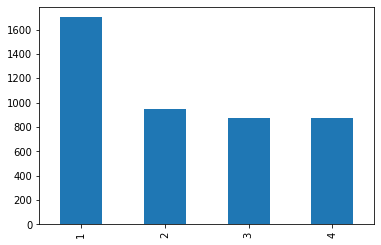

In [43]:
print(pd.value_counts(dataset['well_M']))
pd.value_counts(dataset['well_M']).plot.bar()

### Checking the variation of accuracy with respect to different parameters

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
acc = []
for i in range(0,100):
   
        
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2, random_state = 10)
    classifier = LogisticRegression(solver='lbfgs',multi_class='multinomial',max_iter=100)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc.append(accuracy_score(y_test, y_pred))

plt.plot(range(0,100),acc, c = 'blue')
plt.xlabel('hyperparameter (random Satae)')
plt.ylabel('Accuracy')
plt.show()

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_class, test_size= 0.2)

## featurescaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
print(x_train)

[[-0.79 -1.03 -0.8  ... -1.5  -0.06  0.18]
 [ 1.75  0.7   1.1  ...  1.14 -0.06  0.18]
 [-1.22 -0.73  1.1  ... -0.92 -0.06  0.18]
 ...
 [-1.35 -1.32 -2.05 ...  0.93 -1.87  1.6 ]
 [-0.76 -0.81  0.41 ...  0.23 -0.06  0.18]
 [-1.07 -0.62 -0.58 ...  2.08  1.75  0.18]]


# Training KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

# Predicting Test Result

In [8]:
y_pred = classifier.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 1]
 [4 4]
 ...
 [3 3]
 [4 4]
 [3 1]]


# Evaluating accuracy

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test, y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test, y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[336  15   5  13]
 [ 11 158   3   8]
 [ 30   9 127   8]
 [ 18  18   7 114]]

overall Accuracy: 83.52 %
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       369
           2       0.79      0.88      0.83       180
           3       0.89      0.73      0.80       174
           4       0.80      0.73      0.76       157

   micro avg       0.84      0.84      0.84       880
   macro avg       0.83      0.81      0.82       880
weighted avg       0.84      0.84      0.83       880

kappa : 0.766


## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X = x_train , y = y_train, cv = 10,)

print('Accuracy: {:0.2f} %'.format(accuracies.mean()*100))
print('Standard Deviation: {:0.2f} %'.format(accuracies.std()*100))

Accuracy: 81.91 %
Standard Deviation: 2.05 %


# Feature Importance

# predicting unlabled data

In [51]:
unlabeled = pd.read_csv('Data_unlabeled.csv')

x_unl = unlabeled.iloc[: , 2:].values
x_coordinates = unlabeled.iloc[:,:2]
unlabeled.head(10)

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
0,258143.343169,2.664110e+06,12.36240,8.60310,541.0,4.33529,0.16722,1.75086,0.0,0.16393,...,17.57359,-0.00098,-0.00084,2.48998,256.40796,0.12944,6.25581,0.64865,2.0,2.0
1,258233.343169,2.664110e+06,12.27924,8.59698,536.0,4.33185,0.16012,0.47551,0.0,1.84461,...,40.00359,-0.00244,-0.02385,1.00000,141.52002,0.03725,7.06296,-1.02703,2.0,2.0
2,258323.343169,2.664110e+06,12.19617,8.59179,535.0,4.32848,0.14855,0.90309,0.0,0.91355,...,36.81416,0.00071,0.00571,1.34164,225.42549,0.06861,7.31022,0.54054,2.0,2.0
3,258413.343169,2.664110e+06,12.11320,8.58755,536.0,4.32518,0.14352,1.06532,0.0,0.36503,...,17.57359,0.00220,0.01238,1.84391,113.97736,0.08951,6.68820,2.24324,2.0,2.0
4,258503.343169,2.664110e+06,12.03034,8.58425,537.0,4.32195,0.13879,0.44645,0.0,0.06206,...,22.16388,0.00089,0.00596,0.77460,36.82467,0.03725,7.46354,1.97297,4.0,2.0
5,258593.343169,2.664110e+06,11.94757,8.58189,530.0,4.31879,0.13477,1.07262,0.0,1.78328,...,45.05311,-0.00603,-0.07360,3.13050,483.79874,0.08314,6.73362,-4.02703,4.0,2.0
6,258683.343169,2.664110e+06,11.86491,8.58047,534.0,4.31569,0.13070,0.69362,0.0,0.05827,...,17.57359,0.00170,0.02702,1.34164,61.00688,0.06002,6.92963,1.56757,4.0,2.0
7,258773.343169,2.664110e+06,11.78236,8.58000,532.0,4.31266,0.12659,0.92361,0.0,0.97943,...,41.95362,-0.00221,-0.00000,1.41421,115.40007,0.06657,6.74746,-0.59459,4.0,2.0
8,258143.343169,2.664200e+06,12.32839,8.51334,535.0,4.32580,0.17574,1.00166,0.0,0.84130,...,187.56355,0.00227,-0.01712,1.48324,521.14337,0.06861,6.75585,0.35135,2.0,2.0
9,258233.343169,2.664200e+06,12.24500,8.50716,534.0,4.32241,0.17108,1.20406,0.0,0.33484,...,85.83942,0.00182,0.00387,1.89737,212.62872,0.09688,6.78160,2.32432,2.0,2.0


In [81]:
unlabeled.describe()

,x,y,DFF,DFR,Altitude,Draw_D,Drain_D,LS,Lineam_D,MRVBF,...,SCA,Profile_C,Plan_C,TRI,SPI,Slope,TWI,TPI,litho_recl,geomorph_R
count,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,...,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06,2.050623e+06
mean,2.785837e+05,2.769838e+06,1.665276e+01,2.879438e+00,2.924378e+02,2.893804e+00,1.787532e+00,6.167085e-01,3.283148e-01,4.283471e+00,...,5.094449e+01,-2.422660e-04,5.043758e-03,1.102973e+00,1.133226e+02,4.489459e-02,7.827190e+00,-1.845509e-04,1.991681e+00,3.867365e+00
std,3.924501e+04,4.121798e+04,1.122075e+01,2.015961e+00,8.140779e+01,1.505802e+00,9.370983e-01,7.798539e-01,3.249103e-01,2.335908e+00,...,1.125160e+02,2.018895e-03,4.507086e-02,1.001717e+00,2.669294e+02,4.692912e-02,1.218303e+00,1.594271e+00,5.863884e-01,7.602913e-01
min,1.901933e+05,2.664110e+06,0.000000e+00,0.000000e+00,1.120000e+02,6.020000e-02,3.488000e-02,3.001000e-02,0.000000e+00,0.000000e+00,...,8.786800e+00,-3.930000e-02,-8.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,3.267790e+00,-1.854054e+01,1.000000e+00,1.000000e+00
25%,2.483333e+05,2.739260e+06,8.216390e+00,1.170380e+00,2.250000e+02,1.956870e+00,1.125510e+00,2.336500e-01,7.297000e-02,2.358245e+00,...,1.757359e+01,-1.110000e-03,-8.240000e-03,6.324600e-01,2.287411e+01,1.667000e-02,7.154965e+00,-8.918900e-01,2.000000e+00,4.000000e+00
50%,2.789333e+05,2.768240e+06,1.503970e+01,2.580170e+00,3.000000e+02,2.539690e+00,1.604250e+00,4.525700e-01,2.343500e-01,4.795390e+00,...,2.773437e+01,0.000000e+00,0.000000e+00,1.000000e+00,5.545058e+01,3.725000e-02,7.599890e+00,-2.162200e-01,2.000000e+00,4.000000e+00
75%,3.118733e+05,2.798570e+06,2.273440e+01,4.290100e+00,3.540000e+02,3.446630e+00,2.221660e+00,7.066700e-01,4.886600e-01,6.489440e+00,...,4.970563e+01,8.300000e-04,1.789000e-02,1.414210e+00,1.166023e+02,6.002000e-02,8.127720e+00,7.567600e-01,2.000000e+00,4.000000e+00
max,3.552533e+05,2.862470e+06,6.605499e+01,1.045895e+01,5.800000e+02,1.460942e+01,5.630670e+00,1.952936e+01,1.795300e+00,7.902460e+00,...,1.972872e+04,5.232000e-02,1.466670e+00,3.591378e+01,2.934616e+04,1.068740e+00,1.258302e+01,3.900000e+01,4.000000e+00,5.000000e+00


In [52]:
print(x_unl[0])

[ 1.24e+01  8.60e+00  5.41e+02  4.34e+00  1.67e-01  1.75e+00  0.00e+00
  1.64e-01  2.06e-01  4.00e+00  1.76e+01 -9.80e-04 -8.40e-04  2.49e+00
  2.56e+02  1.29e-01  6.26e+00  6.49e-01  2.00e+00  2.00e+00]


In [53]:
x_unl = sc.transform(x_unl)

In [54]:

label = classifier.predict(x_unl)
print(label[0:5])

[1 1 1 2 2]


In [55]:
x_coordinates.head()

,x,y
0,258143.343169,2.664110e+06
1,258233.343169,2.664110e+06
2,258323.343169,2.664110e+06
3,258413.343169,2.664110e+06
4,258503.343169,2.664110e+06


In [56]:
x_coordinates['well_class'] = label

x_coordinates.head()

C:\Users\Bihari\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,x,y,well_class
0,258143.343169,2.664110e+06,1
1,258233.343169,2.664110e+06,1
2,258323.343169,2.664110e+06,1
3,258413.343169,2.664110e+06,2
4,258503.343169,2.664110e+06,2


1    1057059
2     393602
3     302650
4     297312
Name: well_class, dtype: int64


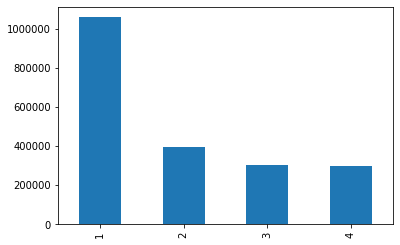

In [57]:
print(pd.value_counts(x_coordinates['well_class']))
pd.value_counts(x_coordinates['well_class']).plot.bar()

In [58]:
#exporting the data
x_coordinates.to_csv('prediction_KNN_agm.csv')

# Grid search (in colab only)

In [ ]:
from sklearn.model_selection import GridSearchCV

alg =['auto','ball_tree','kd_tree','brute']
ls = list(np.arange(10,100))
met = ['minkowski','euclidean','manhattan','seuclidean']
nngb= list(np.arange(1,30,1))
p = list(np.arange(1,5,1))

parameters = [{'algorithm': alg, 'leaf_size': ls, 'metric': met,'n_neighbors': nngb, 'p': p}]

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)